In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
import xgboost as xg
from sklearn.preprocessing import OneHotEncoder
from xgboost import plot_importance
from math import sqrt
from feature_engine.outliers import Winsorizer
import phik
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
import xgboost as xg
from sklearn.preprocessing import OneHotEncoder
from xgboost import plot_importance
from math import sqrt
from feature_engine.outliers import Winsorizer
import phik
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('data.csv', encoding='ISO-8859-1')

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
# Standardize the column names: all lowercase, spaces replaced with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Display the standardized column names to confirm the changes
df.columns.tolist()

['row_id',
 'order_id',
 'order_date',
 'ship_date',
 'ship_mode',
 'customer_id',
 'customer_name',
 'segment',
 'country',
 'city',
 'state',
 'postal_code',
 'region',
 'product_id',
 'category',
 'sub-category',
 'product_name',
 'sales',
 'quantity',
 'discount',
 'profit']

In [6]:
# Convert 'order_date' and 'ship_date' to datetime format
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['ship_date'] = pd.to_datetime(df['ship_date'], errors='coerce')

In [7]:
# Check unique values in categorical columns for consistency
categorical_columns = ['ship_mode', 'segment', 'country', 'region', 'category', 'sub-category']
categorical_uniques = {column: df[column].unique() for column in categorical_columns}

In [8]:
# Statistical summary for numerical columns to identify potential outliers
numerical_summary = df.describe()

In [9]:
# Date Features Engineering
df['order_year'] = df['order_date'].dt.year
df['order_month'] = df['order_date'].dt.month
df['order_day'] = df['order_date'].dt.day
df['order_day_of_week'] = df['order_date'].dt.dayofweek
df['is_weekend'] = df['order_day_of_week'].isin([5, 6]).astype(int)
df['shipping_duration'] = (df['ship_date'] - df['order_date']).dt.days

In [10]:
df.drop('row_id', axis=1, inplace=True)
df.drop('order_id', axis=1, inplace=True)
df.drop('order_date', axis=1, inplace=True)
df.drop('ship_date', axis=1, inplace=True)
df.drop('customer_id', axis=1, inplace=True)
df.drop('customer_name', axis=1, inplace=True)
df.drop('country', axis=1, inplace=True)
df.drop('postal_code', axis=1, inplace=True)
df.drop('product_id', axis=1, inplace=True)

In [11]:
# Calculate unit price as sales divided by quantity
df['unit_price'] = df['sales'] / df['quantity']

# To illustrate the approach, let's take a look at the distribution of unit prices within a specific sub-category
# We'll choose a sub-category with a diverse range of products. For demonstration, let's use "Binders"
binders_unit_prices = df[df['sub-category'] == 'Binders']['unit_price']

# Display basic statistics to understand the distribution of unit prices within "Binders"
binders_unit_prices.describe()

count    1523.000000
mean       36.672279
std       141.421271
min         0.336000
25%         2.742000
50%         5.380000
75%        15.010000
max      1889.990000
Name: unit_price, dtype: float64

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np

def optimal_clusters(data, max_k=10):
    """
    Determine the optimal number of clusters using the Elbow Method and Silhouette Score.
    """
    scores = []
    silhouette_scores = []
    K_range = range(2, max_k + 1)
    cluster_centers = {}

    for K in K_range:
        kmeans = KMeans(n_clusters=K, random_state=42).fit(data)
        scores.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))

    # Silhouette Method: Find the number of clusters with the highest silhouette score
    best_silhouette_index = np.argmax(silhouette_scores)
    best_k = K_range[best_silhouette_index]
    best_kmeans = KMeans(n_clusters=best_k, random_state=42).fit(data)
    
    # Save the cluster centers for the best K
    cluster_centers['centers'] = best_kmeans.cluster_centers_
    cluster_centers['n_clusters'] = best_k

    return best_kmeans.labels_, cluster_centers

# Initialize a dictionary to store cluster centers for each sub-category
sub_category_cluster_centers = {}

# Assuming 'df' is your DataFrame
clustered_data = pd.DataFrame()
for sub_category in df['sub-category'].unique():
    sub_category_data = df[df['sub-category'] == sub_category].copy()
    prices = sub_category_data[['unit_price']]

    if len(prices) > 1:  # Ensure there's enough data for clustering
        labels, centers = optimal_clusters(prices)
        sub_category_data['price_cluster'] = labels
        sub_category_cluster_centers[sub_category] = centers
    else:
        sub_category_data['price_cluster'] = 0  # Assign to a single cluster if not enough data

    clustered_data = pd.concat([clustered_data, sub_category_data])

# 'clustered_data' now includes the 'price_cluster' column, and 'sub_category_cluster_centers' stores the cluster centers for each sub-category.


In [13]:
# Adjust cluster labels to be distinct across different sub-categories
clustered_data['distinct_cluster_label'] = clustered_data['sub-category'] + '_' + clustered_data['price_cluster'].astype(str)

In [14]:
clustered_data.distinct_cluster_label.nunique()

37

In [15]:
clustered_data.drop('product_name', axis=1, inplace=True)

In [16]:
import pandas as pd
import phik

# phik correlation
phik_matrix = clustered_data.phik_matrix()

interval columns not set, guessing: ['sales', 'quantity', 'discount', 'profit', 'order_year', 'order_month', 'order_day', 'order_day_of_week', 'is_weekend', 'shipping_duration', 'unit_price', 'price_cluster']


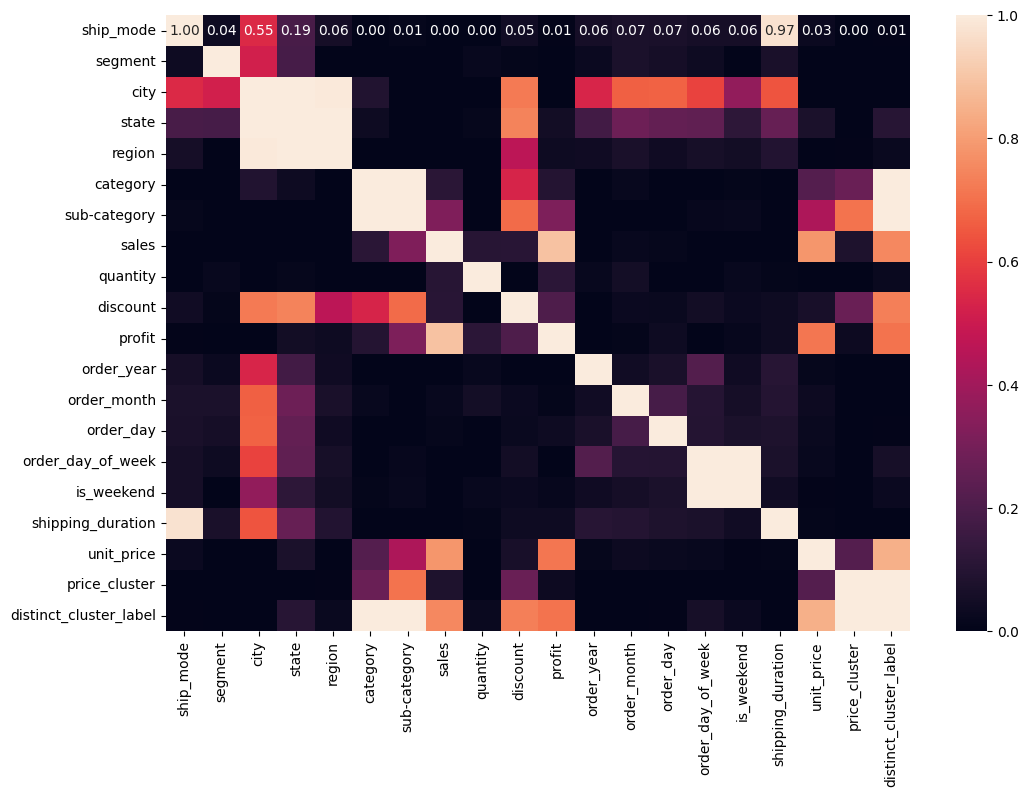

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(phik_matrix, annot=True, fmt=".2f")
plt.show()

In [18]:
# Isolate the correlation with profit
correlation_with_profit_phik = phik_matrix['profit'].sort_values(ascending=False)
print(correlation_with_profit_phik)

profit                    1.000000
sales                     0.893351
unit_price                0.714247
distinct_cluster_label    0.704949
sub-category              0.319992
discount                  0.206762
quantity                  0.115840
category                  0.095263
state                     0.050452
order_day                 0.038294
shipping_duration         0.037399
region                    0.035284
price_cluster             0.032569
is_weekend                0.018712
order_month               0.008245
ship_mode                 0.007790
segment                   0.000000
order_year                0.000000
order_day_of_week         0.000000
city                      0.000000
Name: profit, dtype: float64


In [19]:
clustered_data.phik_matrix() #make a correlation matrix

interval columns not set, guessing: ['sales', 'quantity', 'discount', 'profit', 'order_year', 'order_month', 'order_day', 'order_day_of_week', 'is_weekend', 'shipping_duration', 'unit_price', 'price_cluster']


,ship_mode,segment,city,state,region,category,sub-category,sales,quantity,discount,profit,order_year,order_month,order_day,order_day_of_week,is_weekend,shipping_duration,unit_price,price_cluster,distinct_cluster_label
ship_mode,1.000000,0.035348,0.548095,0.189169,0.055994,0.000000,0.013407,0.000000,0.000000,0.045561,0.007790,0.057733,0.073252,0.067940,0.055855,0.058017,0.973305,0.030088,0.000000,0.007732
segment,0.035348,1.000000,0.518085,0.184435,0.000000,0.000000,0.000000,0.002717,0.020709,0.008694,0.000000,0.030257,0.071246,0.055508,0.035266,0.000000,0.068084,0.000000,0.000000,0.000000
city,0.548095,0.518085,1.000000,0.999295,0.994806,0.089245,0.000000,0.000000,0.000000,0.719693,0.000000,0.538007,0.664495,0.668211,0.605562,0.364793,0.642579,0.000000,0.000000,0.000000
state,0.189169,0.184435,0.999295,1.000000,1.000000,0.038768,0.000000,0.000000,0.012666,0.739258,0.050452,0.174822,0.278118,0.254715,0.248560,0.118075,0.263081,0.073951,0.000000,0.104544
region,0.055994,0.000000,0.994806,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.462015,0.035284,0.040919,0.067270,0.039463,0.061598,0.047846,0.091313,0.000000,0.004652,0.024844
category,0.000000,0.000000,0.089245,0.038768,0.000000,1.000000,1.000000,0.113259,0.000000,0.532328,0.095263,0.000000,0.022924,0.000000,0.000000,0.009464,0.000000,0.220447,0.272141,1.000000
sub-category,0.013407,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.323875,0.000000,0.690038,0.319992,0.000000,0.000000,0.000000,0.017844,0.020278,0.001803,0.428440,0.705013,1.000000
sales,0.000000,0.002717,0.000000,0.000000,0.000000,0.113259,0.323875,1.000000,0.103900,0.105887,0.893351,0.000000,0.021284,0.012936,0.000000,0.000000,0.000000,0.781761,0.080813,0.750250
quantity,0.000000,0.020709,0.000000,0.012666,0.000000,0.000000,0.000000,0.103900,1.000000,0.000000,0.115840,0.022389,0.052362,0.000000,0.000000,0.021446,0.011048,0.000000,0.000000,0.024363
discount,0.045561,0.008694,0.719693,0.739258,0.462015,0.532328,0.690038,0.105887,0.000000,1.000000,0.206762,0.000000,0.028362,0.024361,0.047109,0.028244,0.037130,0.063367,0.270702,0.734189


In [20]:

# Selecting features
features = ['sales', 'unit_price', 'discount', 'quantity', 'distinct_cluster_label', 'sub-category']

# Target variable
target = 'profit'

# Splitting data into 75% train and 25% combined validation and test
X_train, X_test, y_train, y_test = train_test_split(clustered_data[features], clustered_data[target], test_size=0.25, random_state=42)


In [21]:
n_col = X_train.select_dtypes(include = np.number).columns.tolist()  # select all the number columns and append them to n_col
c_col = X_train.select_dtypes(include = ['object']).columns.tolist() # select all the object columns and append them to c_col
print('Numerical Columns:', n_col)
print('Categorical Columns:', c_col)

Numerical Columns: ['sales', 'unit_price', 'discount', 'quantity']
Categorical Columns: ['distinct_cluster_label', 'sub-category']


In [22]:
X_train_n = X_train[n_col] #add the values of the columns to the test and train columns
X_test_n = X_test[n_col]

X_train_c = X_train[c_col]
X_test_c = X_test[c_col]

X_train_n.head()

,sales,unit_price,discount,quantity
5199,2.304,2.304,0.2,1
4648,440.190,48.910,0.0,9
3701,15.168,7.584,0.2,2
7374,7.890,7.890,0.0,1
5237,362.940,120.980,0.0,3


In [23]:
scaler = StandardScaler() #fit the Standard scaler and transform(scale) the numerical dataset
scaler.fit(X_train_n) 
X_train_n_scaled = scaler.transform(X_train_n)
X_test_n_scaled = scaler.transform(X_test_n)

In [24]:
ohe = OneHotEncoder() #encode the categorical column using onehotencoder

X_train_c_encoded = ohe.fit_transform(X_train_c).toarray()
X_test_c_encoded = ohe.transform(X_test_c).toarray()

In [25]:
X_train_final = np.concatenate([X_train_n_scaled,X_train_c_encoded], axis = 1) #combine the scaled and encoded columns
X_test_final = np.concatenate([X_test_n_scaled,X_test_c_encoded], axis = 1)

In [26]:

xgb = xg.XGBRegressor() #Use XGB Regressor

In [27]:
xgb.fit(X_train_final, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<Axes: >

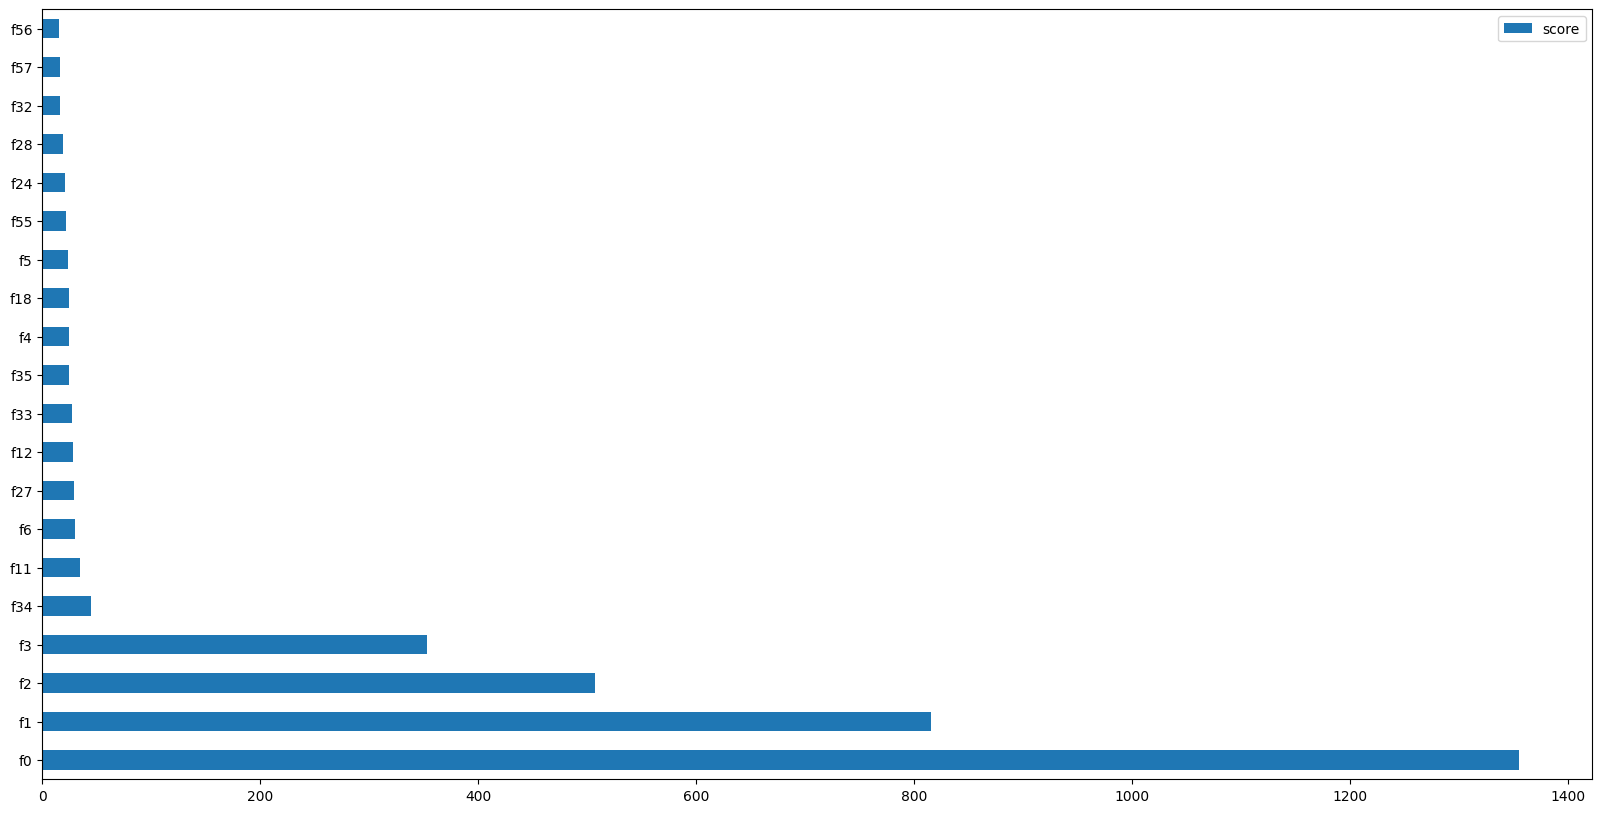

In [28]:
feature_important = xgb.get_booster().get_score() #list the importance Score of each variable, the higher the score the more important the variable 
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(20, columns="score").plot(kind='barh', figsize = (20,10))

In [29]:
y_pred_train = xgb.predict(X_train_final) #predict the model to the data
y_pred_test = xgb.predict(X_test_final)
y_pred_train

array([  1.1731857, 208.28227  ,   2.3743243, ...,   4.497809 ,
        10.003264 ,   8.856773 ], dtype=float32)

In [30]:
print('R2 of Train Set : ', r2_score(y_train, y_pred_train)) #tell the R^2 and RMSE score
print('R2 of Test Set  : ', r2_score(y_test, y_pred_test))
print('RMSE Train-set:', sqrt(mean_squared_error(y_train,y_pred_train)))
print('RMSE Test-set:', sqrt(mean_squared_error(y_test,y_pred_test)))

R2 of Train Set :  0.9944144704489719
R2 of Test Set  :  0.9181995826106478
RMSE Train-set: 18.757436151795737
RMSE Test-set: 49.95590664544016


In [31]:
clustered_data.columns

Index(['ship_mode', 'segment', 'city', 'state', 'region', 'category',
       'sub-category', 'sales', 'quantity', 'discount', 'profit', 'order_year',
       'order_month', 'order_day', 'order_day_of_week', 'is_weekend',
       'shipping_duration', 'unit_price', 'price_cluster',
       'distinct_cluster_label'],
      dtype='object')

In [32]:
clustered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 0 to 9929
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ship_mode               9994 non-null   object 
 1   segment                 9994 non-null   object 
 2   city                    9994 non-null   object 
 3   state                   9994 non-null   object 
 4   region                  9994 non-null   object 
 5   category                9994 non-null   object 
 6   sub-category            9994 non-null   object 
 7   sales                   9994 non-null   float64
 8   quantity                9994 non-null   int64  
 9   discount                9994 non-null   float64
 10  profit                  9994 non-null   float64
 11  order_year              9994 non-null   int32  
 12  order_month             9994 non-null   int32  
 13  order_day               9994 non-null   int32  
 14  order_day_of_week       9994 non-null   int32

In [33]:
clustered_data.head(5)

,ship_mode,segment,city,state,region,category,sub-category,sales,quantity,discount,profit,order_year,order_month,order_day,order_day_of_week,is_weekend,shipping_duration,unit_price,price_cluster,distinct_cluster_label
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,2016,11,8,1,0,3,130.9800,0,Bookcases_0
27,Standard Class,Consumer,Philadelphia,Pennsylvania,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522,2015,9,17,3,0,4,440.4900,1,Bookcases_1
38,Standard Class,Home Office,Houston,Texas,Central,Furniture,Bookcases,532.3992,3,0.32,-46.9764,2015,12,27,6,1,4,177.4664,0,Bookcases_0
189,First Class,Home Office,New York City,New York,East,Furniture,Bookcases,899.1360,4,0.20,112.3920,2015,10,12,0,0,2,224.7840,0,Bookcases_0
192,First Class,Home Office,New York City,New York,East,Furniture,Bookcases,626.3520,3,0.20,46.9764,2015,10,12,0,0,2,208.7840,0,Bookcases_0


In [34]:
df_inf = { #make new dataframe for inference
'ship_mode': 'Second Class', 
'segment': 'Consumer', 
'city': 'San Diego', 
'state':'California', 
'region':'West', 
'category':'Furniture',
'sub-category': 'Tables', 
'product_name':'Bretford CR4500 Series Slim Rectangular Table', 
'sales': 276, 
'quantity': 5,
'discount': 0.1,
'order_year':2016, 
'order_month':11, 
'order_day':8, 
'order_day_of_week':2,
'is_weekend': 1, 
'shipping_duration':7, 
'unit_price':23,
'price_cluster':1,
'distinct_cluster_label': 'Fasteners_0'
}

df_inf = pd.DataFrame([df_inf])
df_inf

,ship_mode,segment,city,state,region,category,sub-category,product_name,sales,quantity,discount,order_year,order_month,order_day,order_day_of_week,is_weekend,shipping_duration,unit_price,price_cluster,distinct_cluster_label
0,Second Class,Consumer,San Diego,California,West,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,276,5,0.1,2016,11,8,2,1,7,23,1,Fasteners_0


In [35]:
df_inf_n = df_inf[n_col]
df_inf_c = df_inf[c_col]

In [36]:
df_inf_n_scaled = scaler.transform(df_inf_n)
df_inf_c_encoded = ohe.transform(df_inf_c).toarray()

In [37]:
df_inf_final = np.concatenate([df_inf_n_scaled,df_inf_c_encoded], axis = 1)

In [38]:
y_pred_inf = xgb.predict(df_inf_final) #from the data, the profit will be 46.81
print('profit:', round(y_pred_inf[0],2))

profit: 46.81
